Ref: https://www.joinquant.com/post/7952

本节目的： 仅仅是对模型构建有一个粗略的概念上的了解。



### 1) 函数逼近问题

这个问题包括两种变量：

- 第一类变量（输出）：试图要预测的变量$y$。 常被称作：**目标**，**标签**，**结果**... 。

- 第二类变量（输入）：用来进行预测的变量$x$。 常被称作：**预测因子**，**回归因子**，**特征**，**属性**... 。

这个问题目标是：构建以第二类变量为输入的函数来预测第一类变量。 可形式表示成：

$$y \sim pred(x)$$

所谓**特征工程**，就是决定使用那些**特征**进行预测。

#### 使用训练数据


对于一次预测而言，预测函数$pred(\boldsymbol{x})$是一个多元函数。 但为了建立这个**预测函数**或者**预测模型**，我们需要一定数量的、给定**特征**的、已知**结果**的**数据集**。

于是，**预测因子**可以排成一个形式矩阵$\boldsymbol{X}$,而**结果**则可以排成一个列向量$\boldsymbol{y}$。 每行分别对应一个**样本特征**和**样本值**。

如果**预测目标**是离散的、无顺序关系的(比如：岩石或水雷)，那么对应的问题被称为**分类问题**。只有两个离散值就是**2分类问题**，有多个离散值就是**多分类问题**。

如果**预测目标**是实数的、有顺序关系的，那么对应的问题被称为**回归问题**。

#### 评估预测模型的性能

对于**回归问题**，有两个常用的度量回归性能的指标：

- **均方误差**（MSE, Mean Squared Error）

$$ \dfrac{1}{m}\sum_{i=1}^{m} {[y_i - pred(x_i)]^2}$$

- **平均绝对误差**(MAE, Mean Absolute Error)

$$ \dfrac{1}{m} \sum_{i=1}^{m} {|y_i - pred(x_i)|}$$

对于**分类问题**，最常用的分类指标是**误分率**,即计算$pred(.)$预测错误的样本比例。

**注意**：对模型进行评估的最佳经验是从训练数据集中预留部分数据作为测试数据集。

在训练集中，就是不断调整预测函数$pred(*)$使性能指标最低。

在测试集中， 预测函数$pred(*)$是固定的，只有这种情况计算得到的性能才能算是模型的性能。

### 2) 影响算法选择和性能的因素

#### 问题和模型的复杂度

原本我想画3张图，但只画了第一张图（其实书中也没给出绘图代码）：

第一张图（对应简单2分类问题）： 从两个二维高斯分布（中心点不一样，其它一样）采样得到的散点图，一类红色另一类绿色。


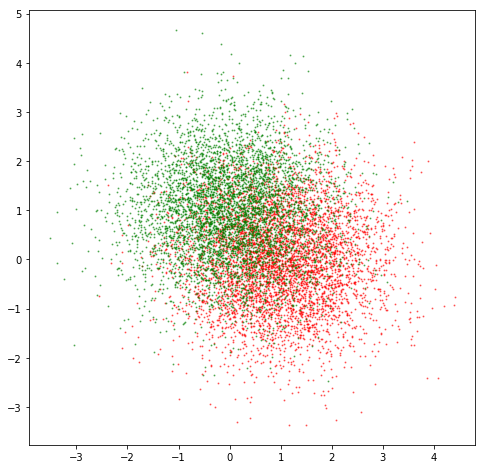

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8,8))

x1,y1 = np.random.multivariate_normal([1,0], [[1, 0], [0, 1]], 5000).T
x2,y2 = np.random.multivariate_normal([0,1], [[1, 0], [0, 1]], 5000).T
plt.scatter(x1, y1, s=1, c='r', alpha=0.5)
plt.scatter(x2, y2, s=1, c='g', alpha=0.5)
plt.show()


第二张图（对应复杂2分类问题, 未绘制）： 此图如何绘制，书中语焉不详，我无从绘制。
![](figure-3-2.png)
第三张图（对应没有太多数据的复杂2分类，未绘制）： 对第二张图的散点抽样1%得到。
![](figure-3-3.png)

第一张图，我们知道，从概率角度说，直线$y=x$是最好的分类器。 从此我们感觉到： **简单的问题应该可以用简单的模型（线性模型）解决**。

第二张图（未绘，请看书），至少用一条线性边界效果不好, 可能要到用非线性边界。 至少我们可以说：**复杂问题可能要用复杂模型（非线性模型）解决**。
![](figure-3-6.png)

第三张图（未绘，请看书）, **尽管依然是复杂问题，但由于数据量少，很难在视觉上进行区分，此时用线性模型可能是更好的选择**。 
![](figure-3-7.png)

**总结**：一般而言，最好的办法是用复杂模型解决复杂问题，简单模型解决简单问题，但少量数据的复杂问题可能用简单模型更有效, 另外解决少量数据的问题，集成模型也是一个不错的考虑。

#### 预测算法的性能

考虑一个线性模型：

$$\boldsymbol{y}_{n \times 1} \sim \boldsymbol{X}_{n \times m} \boldsymbol{\beta}_{m \times 1} $$

$n$是样本个数，而$m$是属性个数，同时也是有待学习系数$\beta$的个数，也常被称作**自由度**。

如果模型的自由度很大，比如基因数据和自然语言处理，都有很大的自由度。 基因数据的采集很贵自然限制了样本个数的采集，而自然语言虽然采集容易，但其自由度往往比基因数据更大。进而导致$m \gg n$。 在这种情况下，线性模型相对于复杂的集成方法，可能会产生相同甚至更好的性能。

#### 选择一个算法

和前面相反，如果$m \ll n$的复杂问题，则倾向于使用非线性模型。 当然最后到底是选择线性模型还是非线性模型，还必须考虑**训练时间**。


### 3)  度量预测模型的性能

#### 不同类型问题的性能评价指标

- 在回归问题中：

In [28]:
import numpy as np

def MSE(targ, pred):
    '''
        均方误差
    '''
    
    if isinstance(targ, list):
        targ = np.array(targ)
    if isinstance(pred, list):
        pred = np.array(pred)
    assert isinstance(targ, np.ndarray) and isinstance(pred, np.ndarray) and len(targ)==len(pred)
    
    return ((targ-pred)**2).sum()/len(targ)

def RMSE(targ, pred):
    '''
        均方误差的平方根
    '''
    
    return np.sqrt(MSE(targ, pred))

def MAE(targ, pred):
    '''
        平均绝对误差
    '''
    
    if isinstance(targ, list):
        targ = np.array(targ)
    if isinstance(pred, list):
        pred = np.array(pred)
    assert isinstance(targ, np.ndarray) and isinstance(pred, np.ndarray) and len(targ)==len(pred)
    
    return np.abs(targ-pred).sum()/len(targ)

targ = [1.5,2.1,3.3,-4.7,-2.3,0.75]
pred = [0.5,1.5,2.1,-2.2,0.1, -0.5]

print("均方误差:",MSE(targ, pred) )
print("均方误差的平方根:",RMSE(targ, pred) )
print("平均绝对误差:",MAE(targ, pred) )
print("目标的方差:",np.array(targ).var() )
print("目标的标准:",np.array(targ).std() )

均方误差: 2.72875
均方误差的平方根: 1.65189285367
平均绝对误差: 1.49166666667
目标的方差: 7.57034722222
目标的标准: 2.75142639775
